In [1]:
import csv
import glob
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.style.use('ggplot')
import numpy as np
import os
import pandas as pd
import shutil
%matplotlib inline

%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['font.size'] = 16
plt.rcParams['text.usetex'] = False
plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
plt.rcParams['axes.titlesize'] = 1.5*plt.rcParams['font.size']
plt.rcParams['legend.fontsize'] = 16

In [2]:
raw_data = pd.read_csv('fighter_data.csv')

In [3]:
df_5w = raw_data[(raw_data['w'].astype(int)+raw_data['l'].astype(float)+raw_data['d'].astype(float)) >= 5]

In [4]:
significant_df = df_5w[(df_5w['SLpM']
           + df_5w['Str. Acc.'].apply(lambda x: x.strip('%')).astype(float)
           + df_5w['SApM']
           + df_5w['Str. Def'].apply(lambda x: x.strip('%')).astype(float)
           + df_5w['TD Avg']
           + df_5w['TD Acc.'].apply(lambda x: x.strip('%')).astype(float)
           + df_5w['TD Def.'].apply(lambda x: x.strip('%')).astype(float)
           + df_5w['Sub. Avg.']) > 0
          ]
significant_df.head()

,first,last,nickname,height,weight,reach,stance,w,l,d,belt,SLpM,Str. Acc.,SApM,Str. Def,TD Avg,TD Acc.,TD Def.,Sub. Avg.
1,Danny,Abbadi,The Assassin,"5' 11""",155 lbs.,n/a,Orthodox,4,6,0,n/a,3.29,38%,4.41,57%,0.00,0%,77%,0.0
2,David,Abbott,Tank,"6' 0""",265 lbs.,n/a,Switch,10,14,0,n/a,1.35,30%,3.55,38%,1.07,33%,66%,0.0
3,Shamil,Abdurakhimov,Abrek,"6' 3""",235 lbs.,"76.0""",Orthodox,16,4,0,n/a,2.48,45%,2.50,58%,1.40,22%,77%,0.3
4,Hiroyuki,Abe,Abe Ani,"5' 6""",145 lbs.,n/a,Orthodox,8,14,3,n/a,1.71,36%,3.11,63%,0.00,0%,33%,0.0
5,Papy,Abedi,Makambo,"5' 11""",185 lbs.,"74.0""",Southpaw,9,3,0,n/a,2.80,55%,3.15,48%,3.47,57%,50%,1.3


In [17]:
#attempt dimensional reduction by observing correlation matrix
stats_df = significant_df.filter(['SLpM','Str. Acc.','SApM', 'Str. Def', 'TD Avg', 
                                 'TD Acc.', 'TD Def.', 'Sub. Avg.'], 
                                 axis=1)
stats_df['Str. Acc.'] = stats_df['Str. Acc.'].apply(lambda x: x.strip('%')).astype(float)
stats_df['Str. Def'] = stats_df['Str. Def'].apply(lambda x: x.strip('%')).astype(float)
stats_df['TD Acc.'] = stats_df['TD Acc.'].apply(lambda x: x.strip('%')).astype(float)
stats_df['TD Def.'] = stats_df['TD Def.'].apply(lambda x: x.strip('%')).astype(float)
stats_df.head()

,SLpM,Str. Acc.,SApM,Str. Def,TD Avg,TD Acc.,TD Def.,Sub. Avg.
1,3.29,38,4.41,57,0.00,0,77,0.0
2,1.35,30,3.55,38,1.07,33,66,0.0
3,2.48,45,2.50,58,1.40,22,77,0.3
4,1.71,36,3.11,63,0.00,0,33,0.0
5,2.80,55,3.15,48,3.47,57,50,1.3


In [18]:
xticks = ['SLpM','Str. Acc.','SApM', 'Str. Def', 'TD Avg', 'TD Acc.', 'TD Def.', 'Sub. Avg.']

In [19]:
stats_df.as_matrix().shape

(2014, 8)

In [23]:
a = stats_df.astype(float).as_matrix().transpose()
b = np.corrcoef(a)

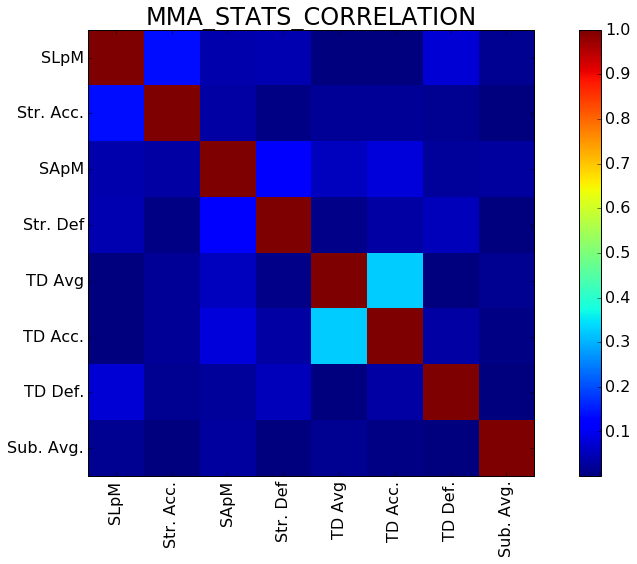

In [24]:
fig, ax = plt.subplots()
# im = ax.imshow(np.square(stats_df.corr()),interpolation='nearest')
im = ax.imshow(np.square(b),interpolation='nearest')
fig.colorbar(im)
ax.set_yticks(range(len(xticks)))
ax.set_yticklabels(xticks, rotation='horizontal')
ax.set_xticks(range(len(xticks)))
ax.set_xticklabels(xticks, rotation='vertical')
ax.set_title('MMA_STATS_CORRELATION')
pass